In [22]:
from numpy import mean
from numpy import std
from matplotlib import pyplot as plt
from sklearn.model_selection import KFold
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.optimizers import SGD


In [23]:
def load_dataset():
  (trainX, trainY), (testX, testY) = mnist.load_data()

  trainX, trainY = trainX[:len(trainX)//100], trainY[:len(trainY)//100]
  testX, testY = testX[:len(testX)//100], testY[:len(testY)//100]

  trainX = trainX.reshape((trainX.shape[0], 28, 28, 1))
  testX = testX.reshape((testX.shape[0], 28, 28, 1))
  trainY = to_categorical(trainY)
  testY = to_categorical(testY)
  return trainX, trainY, testX, testY

In [24]:
def prep_pixels(train,test):
  train_norm = train.astype('float32')
  test_norm = test.astype('float32')
  train_norm = train_norm / 255.0
  test_norm = test_norm / 255.0
  return train_norm, test_norm

In [25]:
def define_model():
    model = Sequential()
    model.add(Conv2D(32, (3,3), activation='relu', kernel_initializer='he_uniform', input_shape=(28,28,1)))
    model.add(MaxPooling2D((2,2)))
    model.add(Conv2D(64, (3,3), activation='relu', kernel_initializer='he_uniform'))
    model.add(Conv2D(64, (3,3), activation='relu', kernel_initializer='he_uniform'))
    model.add(MaxPooling2D((2,2)))
    model.add(Flatten())
    model.add(Dense(200, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(10, activation='softmax'))

    opt = SGD(learning_rate=0.01, momentum=0.9)
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    return model


In [26]:
def evaluate_model(dataX, dataY, n_folds=5):
  scores, histories = list(), list()
  kfold = KFold(n_folds, shuffle=True, random_state=1)
  for train_ix, test_ix in kfold.split(dataX):
    model = define_model()
    trainX, trainY, testX, testY = dataX[train_ix], dataY[train_ix], dataX[test_ix], dataY[test_ix]
    history = model.fit(trainX, trainY, epochs=10, batch_size=32, validation_data=(testX, testY), verbose=0)
    _, acc = model.evaluate(testX, testY, verbose=0)
    print('> %.3f' % (acc * 100.0))
    scores.append(acc)
    histories.append(history)
  return scores, histories

In [27]:
def summarize_diagnostics(histories):
    for i in range(len(histories)):
        plt.subplot(2, 1, 1)
        plt.title('Cross Entropy Loss')
        plt.plot(histories[i].history['loss'], color='blue', label='train')
        plt.plot(histories[i].history['val_loss'], color='orange', label='test')
        plt.subplot(2, 1, 2)
        plt.title('Classification Accuracy')
        plt.plot(histories[i].history['accuracy'], color='blue', label='train')
        plt.plot(histories[i].history['val_accuracy'], color='orange', label='test')
        plt.show()

def summarize_performance(scores):
    print('Accuracy: mean=%.3f std=%.3f, n=%d' % (mean(scores)*100, std(scores)*100, len(scores)))
    plt.boxplot(scores)
    plt.show()

> 92.500
> 95.000
> 88.750
> 95.000
> 90.000


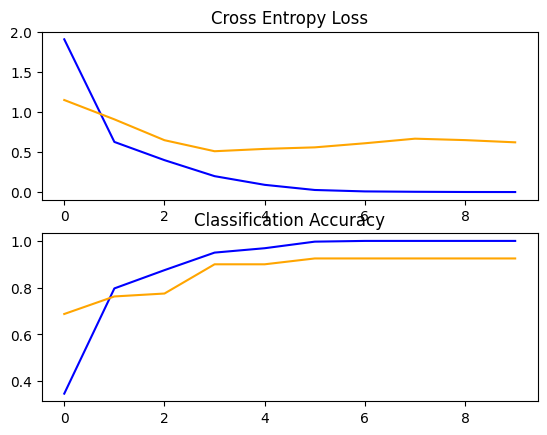

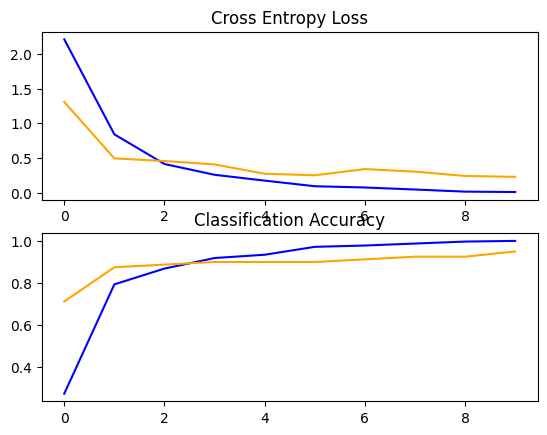

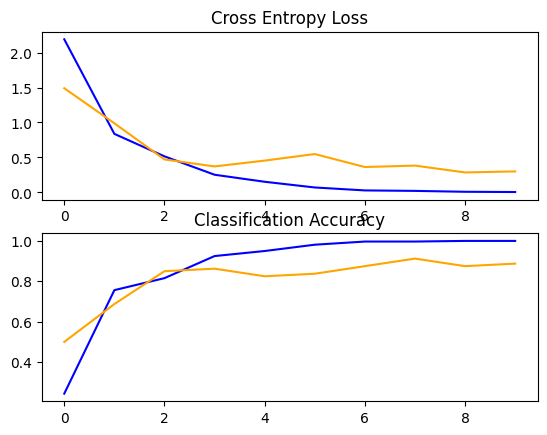

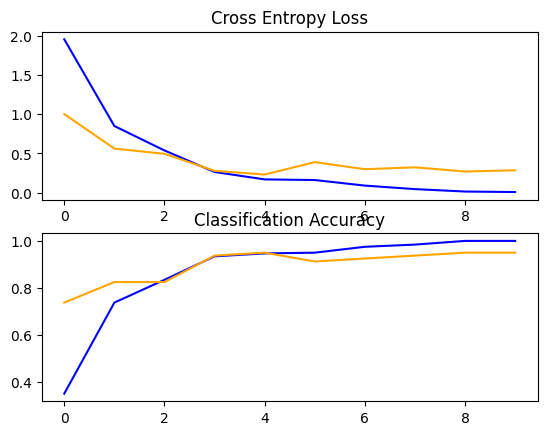

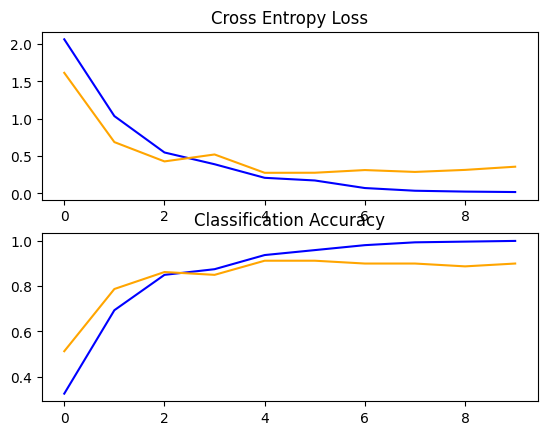

Accuracy: mean=92.250 std=2.550, n=5


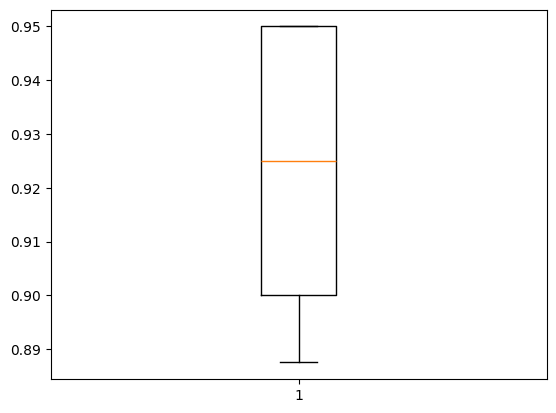

In [28]:
# Carregando e processando os dados
dataX, dataY, testX, testY = load_dataset()
dataX, testX = prep_pixels(dataX, testX)

# Avaliação do modelo
scores, histories = evaluate_model(dataX, dataY)

# Sumário dos resultados
summarize_diagnostics(histories)
summarize_performance(scores)